In [1]:
import nltk
from nltk import word_tokenize
import string
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Draw Zipf

In [2]:
def plotZipf(token_list, common_size):
  all_fdist = nltk.FreqDist(token_list).most_common(common_size)

  ## Conversion to Pandas series via Python Dictionary for easier plotting
  all_fdist = pd.Series(dict(all_fdist))

  ## Setting figure, ax into variables
  fig, ax = plt.subplots(figsize=(16,10))

  ## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
  sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax, color='lightblue')
  sns.lineplot(x=all_fdist.index, y=all_fdist.values, ax=ax, color='blue')
  plt.xticks(rotation=90)
  plt.title('Zipf',fontsize=15)
  plt.xlabel('word',fontsize=15)
  plt.ylabel('freqency',fontsize=15)
  plt.xlim(0)  

In [3]:
all = pd.read_csv('PubMed10000_withID.csv')

In [4]:
all_str = ""

In [5]:
for index, article in all.iterrows():
  all_str += article['title']
  all_str += " "
  if(article['abstract'] is not np.nan):
    all_str += article['abstract']
    all_str += " "

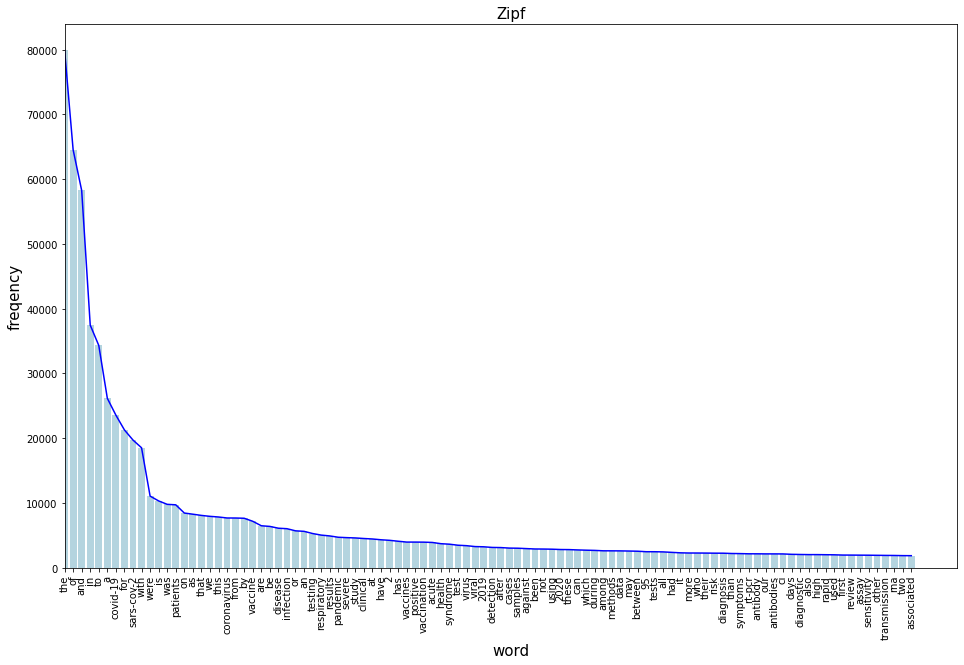

In [6]:
# without punctuation
withoutPunc_tokens = list(filter(lambda token: token not in string.punctuation, word_tokenize(all_str)))
withoutPunc_tokens = [token.lower() for token in withoutPunc_tokens]
pd.DataFrame(list(nltk.FreqDist(withoutPunc_tokens).items()), columns=['word', 'count']).to_csv('withoutPunc_tokens.csv', index=False)
plotZipf(withoutPunc_tokens, 100)

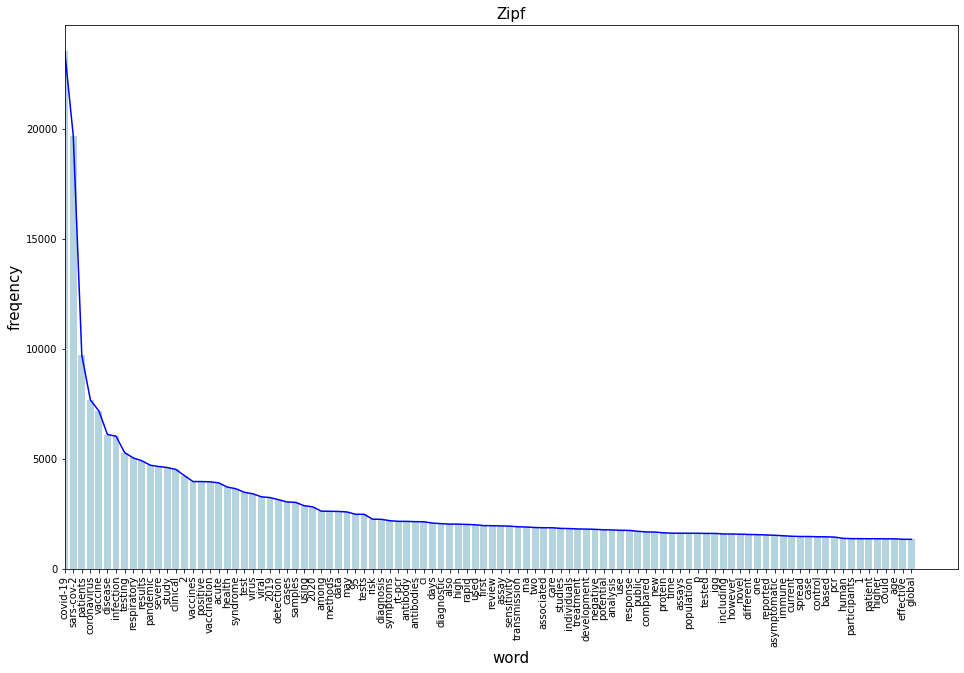

In [7]:
# without punctuation and remove stopwords
all_stopwords = stopwords.words('english')
withoutPuncStopword_tokens = [word for word in withoutPunc_tokens if not word in all_stopwords]
plotZipf(withoutPuncStopword_tokens, 100)

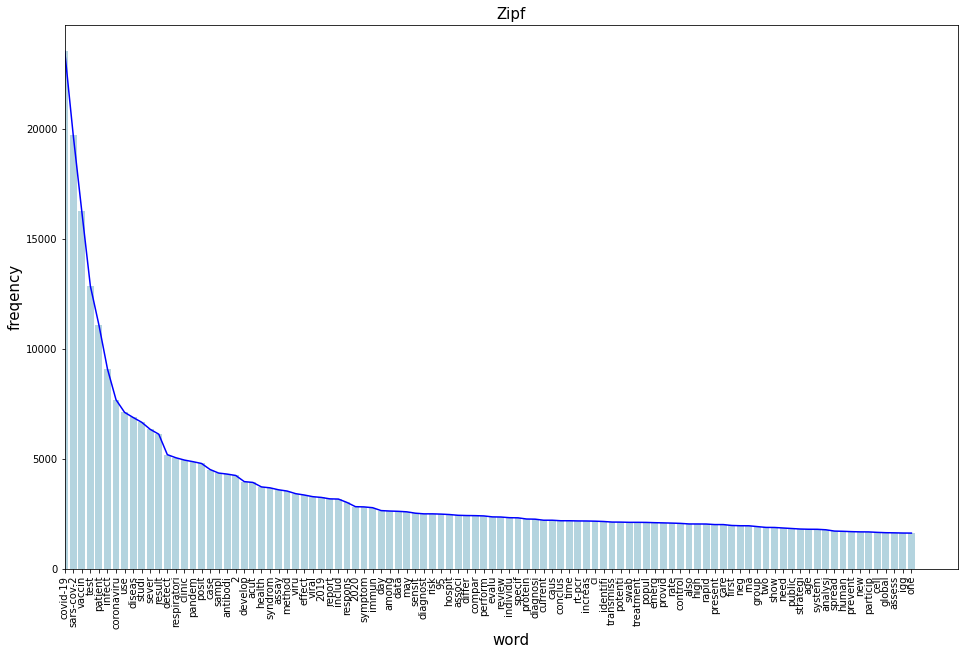

In [8]:
# without punctuation, remove stopwords and using Porter algorithm
stemmer = PorterStemmer()
Porter_withoutPuncStopword_tokens = [stemmer.stem(word) for word in withoutPuncStopword_tokens]
plotZipf(Porter_withoutPuncStopword_tokens, 100)

# Word index preprocessing

In [9]:
res_dict = {}
stemmer = PorterStemmer()

for article_idx, article in all.iterrows():
  if(article['abstract'] is not np.nan):
    for token_idx, token in enumerate(word_tokenize(article['abstract'])):
      word_withoutStem = stemmer.stem(token.lower())
      if word_withoutStem in res_dict:
        if article_idx+1 in res_dict[word_withoutStem]:
          res_dict[word_withoutStem][article_idx+1].append(token_idx)
        else:
          res_dict[word_withoutStem][article_idx+1] = [token_idx]
      else:
        res_dict[word_withoutStem] = {article_idx+1: [token_idx]}

In [10]:
import pickle
file = open("word_index.pkl", "wb")
pickle.dump(res_dict, file)
file.close()